# Genshin Impact Analysis



[URL Dashboard](https://public.tableau.com/views/GenshinImpactRevenue/CharacterRevenue?:language=en-US&:display_count=n&:origin=viz_share_link)

# 1. Introduction

- Name: Audrey Wanto
- Batch: BSD-002

***This notebook analyzes the data from Genshin Impact's revenue from their 'Wishing' system.***

### Genshin Impact Introduction

Genshin Impact is an open world RPG featuring limited-edition characters (referred to as 5* characters in this case study) that can be obtained through their 'wishing' system. One wish costs 160 primogems, and there is a guaranteed pity system in which a 5* character will appear within 90 wishes. However, during a limited-edition banner, there is a chance to lose to a 5* standard banner character, which is a permanent banner that features 7 characters. If a user lost to a standard banner character, their next 5* character is guaranteed to be the featured limited-edition 5* character.

# 2. Identifying the problem

## Defining the problem Statement
### Using SMART Framework:
1. **Specific**: Finding which character would provide highest revenue in a rerun banner
2. **Measurable**: Achieve at least 80% of the average revenue sales from rerun banners
3. **Achievable**: Creating side quests featuring said character, adjust character stats, add a new artifact set for character
4. **Relevant**: Adjusting to what the playerbase wants for characters, whether it be making the character stronger, more desirable designs, or meta
5. **Time-Bound**: Plan which character to put out for the 4.4 update banner (20 December 2023)

### Problem Statement:
The goal is to find out which characters in Genshin Impact would provide the most revenue for miHoYo as a rerun banner by analyzing past data from 2020-2023 (up to latest finished banner) during the 4.4 Banner update in 20 December 2023.

### Breaking down the problem:
Main problem:  ```Finding out which characters had the highest revenue in sales, and if they've had rerun banners already```

#### Problem exploration:
- Which 5* character had the highest and lowest revenue (first launch)?
- Which 5* character had the highest and lowest rerun revenue?
- How much revenue did each vision from the 5* characters featured in each banners?
- How much revenue did the female and male characters make?
- How many reruns have each character had, and how much revenue did each character make?
- What is the average revenue each day throughout the length of each banner?
- What is the revenue trend year after year, and how does this describe the player retention rate?
- Decide on the factors that affect rerun revenue and display top 5 characters that would have the highest probability for the highest rerun.
- Do a hypothesis test on whether the revenue made from female characters are the same with the revenue made from male characters.

##### Assumptions:
- Banners with 2 characters will have the revenue split in half (as there is no data for each character during those banners)
- Taking into account 5* Characters will max out at 6 constellations (7 copies of the same character), the amount of reruns each character has had will matter.


# 3. Data Loading

[Link Kaggle (*up to 2022*)](https://www.kaggle.com/datasets/saladyong/genshin-impact-banner-revenue)

[Link for manually updated dataset (*up to 2023*)](https://mega.nz/file/8d5lVDyb#pmL6OlHH5lTaTdUfFBMk3HrQI-DxE7tZgk5DweJWq8Q)

[Link for Genshin Impact Character dataset](https://www.kaggle.com/datasets/sophiahealy/genshin-impact-character-data)

In [ ]:
'''
Import google drive as the coding is done on Google Colab
'''

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''
Import the dataset into python and creating a dataframe
'''

import pandas as pd

genshin = pd.read_csv('/content/drive/MyDrive/genshin_rev.csv')

genshin.tail()

,version,version_name,start_date,end_date,5_star_characters,rerun,revenue,banner_days,avg_revenue
75,3.8,Secret Summer Paradise,25/07/2023,15/08/2023,Wanderer,1,"9,129,631",21,"434,744.33"
76,4.0,As Light Rain Falls Without Reason,16/08/2023,5/9/2023,Lyney,0,"11,472,539",20,"573,626.95"
77,4.0,As Light Rain Falls Without Reason,16/08/2023,5/9/2023,Yelan,2,"11,472,539",20,"573,626.95"
78,4.0,As Light Rain Falls Without Reason,5/9/2023,26/09/2023,Zhongli,4,"9,039,617",21,"430,457.95"
79,4.0,As Light Rain Falls Without Reason,5/9/2023,26/09/2023,Tartaglia,4,"9,039,617",21,"430,457.95"


# 4. Data Cleaning

In [ ]:
'''
Checking the dataset and the data type to see what needs to be cleaned
'''
genshin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   version            80 non-null     float64
 1   version_name       80 non-null     object 
 2   start_date         80 non-null     object 
 3   end_date           80 non-null     object 
 4   5_star_characters  80 non-null     object 
 5   rerun              80 non-null     int64  
 6   revenue            80 non-null     object 
 7   banner_days        80 non-null     int64  
 8   avg_revenue        80 non-null     object 
dtypes: float64(1), int64(2), object(6)
memory usage: 5.8+ KB


In [ ]:
'''
Replacing ',' with empty space to convert data type into float
'''
genshin = genshin.replace(',', '', regex=True)

In [ ]:
'''
Method to change data type of an entire column into float
'''
def to_float (data, cols):
    data[cols] = data[cols].astype(float)
    return data

genshin = to_float(genshin, ['revenue', 'avg_revenue'])

In [ ]:
'''
Changing data type into datetime
'''

genshin['start_date'] = pd.to_datetime(genshin['start_date'])
genshin['end_date'] = pd.to_datetime(genshin['end_date'])

<ipython-input-7-9612d6261fd4>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  genshin['start_date'] = pd.to_datetime(genshin['start_date'])
<ipython-input-7-9612d6261fd4>:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  genshin['end_date'] = pd.to_datetime(genshin['end_date'])


In [ ]:
'''
Creating a new dataframe from another dataset to add columns for the main dataframe
'''
character_data = pd.read_csv('/content/drive/MyDrive/genshin.csv', engine='python',encoding='latin1')

In [ ]:
'''
Checking to see if the names match the data with the main dataframe
'''
character_data['character_name'].unique()

array(['Albedo', 'Alhaitham', 'Aloy', 'Amber', 'Arataki Itto', 'Baizhu',
       'Barbara', 'Beidou', 'Bennett', 'Candace', 'Chongyun', 'Collei',
       'Cyno', 'Dehya', 'Diluc', 'Diona', 'Dori', 'Eula', 'Faruzan',
       'Fischl', 'Freminet', 'Ganyu', 'Gorou', 'Hu Tao', 'Jean',
       'Kaedehara Kazuha', 'Kaeya', 'Kamisato Ayaka', 'Kamisato Ayato',
       'Kaveh', 'Keqing', 'Kirara', 'Klee', 'Kujou Sara', 'Kuki Shinobu',
       'Layla', 'Lisa', 'Lynette', 'Lyney', 'Mika', 'Mona', 'Nahida',
       'Nilou', 'Ningguang', 'Noelle', 'Qiqi', 'Raiden Shogun', 'Razor',
       'Rosaria', 'Sangonomiya Kokomi', 'Sayu', 'Shenhe',
       'Shikanoin Heizou', 'Sucrose', 'Tartaglia', 'Thoma', 'Tighnari',
       'Traveler (Aether)', 'Traveler (Lumine)', 'Venti', 'Wanderer',
       'Xiangling', 'Xiao', 'Xingqiu', 'Xinyan', 'Yae Miko', 'Yanfei',
       'Yaoyao', 'Yelan', 'Yoimiya', 'Yun Jin', 'Zhongli'], dtype=object)

In [ ]:
'''
List out the unique values of names in the main dataframe
'''
genshin['5_star_characters'].unique()

array(['Venti', 'Klee', 'Tartaglia', 'Zhongli', 'Albedo', 'Ganyu', 'Xiao',
       'Keqing', 'Hu Tao', 'Eula', 'Kaedehara Kazuha', 'Kamisato Ayaka',
       'Yoimiya', 'Raiden Shogun', 'Sangonomiya Kokomi', 'Arataki Itto',
       'Shenhe ', 'Yae Miko', 'Kamisato Ayato', 'Yelan ', 'Tighnari',
       'Cyno', 'Nilou', 'Nahida', 'Wanderer', 'Alhaitham', 'Dehya',
       'Baizhu', 'Lyney'], dtype=object)

In [ ]:
'''
Delete the whitespace from the main dataframe
'''
genshin['5_star_characters'] = genshin['5_star_characters'].apply(lambda x: x.strip())

In [ ]:
'''
Create 2 new columns in the main dataframe
Vision column -> the vision/element of each character
Gender column -> the gender of each character
'''
vision = []
gender = []

for i in genshin['5_star_characters']:
  for j in character_data['character_name']:
    if i == j:
      vision_val = character_data.loc[(character_data['character_name'].eq(i)),'vision']
      gender_val = character_data.loc[(character_data['character_name'].eq(i)), 'model']
      vision.append(vision_val.item())
      gender.append(gender_val.item())

genshin['vision'] = vision
genshin['gender'] = gender

In [ ]:
'''
Checking the dataset to see if all columns have the right data type after cleaning
'''
genshin.tail()

,version,version_name,start_date,end_date,5_star_characters,rerun,revenue,banner_days,avg_revenue,vision,gender
75,3.8,Secret Summer Paradise,2023-07-25,2023-08-15,Wanderer,1,9129631.0,21,434744.33,Anemo,Medium Male
76,4.0,As Light Rain Falls Without Reason,2023-08-16,2023-05-09,Lyney,0,11472539.0,20,573626.95,Pyro,Medium Male
77,4.0,As Light Rain Falls Without Reason,2023-08-16,2023-05-09,Yelan,2,11472539.0,20,573626.95,Hydro,Tall Female
78,4.0,As Light Rain Falls Without Reason,2023-05-09,2023-09-26,Zhongli,4,9039617.0,21,430457.95,Geo,Tall Male
79,4.0,As Light Rain Falls Without Reason,2023-05-09,2023-09-26,Tartaglia,4,9039617.0,21,430457.95,Hydro,Tall Male


# 5. Analysis and Calculations

Before being able to do any calculations or analysis, there will be 2 assumptions taking place.

The **first** assumption will be that if there are 2 banners running simultaneously during the same period, the revnue will be split 50-50. This is because the data provided only gave the total revenue of both characters, and not separately.

The **second** assumption will be that whenever any analysis and calculations are done related to reruns, there will be the factor of a character being maxed out after 6 constellations. This means that after getting a character 7 times in total, there is no further need to 'wish' for that character anymore.

In [ ]:
'''
Importing modules to create charts
'''

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
'''
Get the duplicate time values into a list
'''

dup_time = []

store = genshin.loc[(genshin['start_date'].duplicated() == True), 'start_date']

for d in store:
  dup_time.append(d)

In [ ]:
'''
Get the row index of the duplicate time values
'''

num = []

for w in genshin['start_date']:
  if w in dup_time:
    row_num = genshin[genshin['start_date'] == w].index.to_numpy()
    num.append(row_num[0])
    num.append(row_num[1])

num_set = set(num)
print(num_set)

{21, 22, 24, 25, 26, 27, 29, 30, 31, 32, 34, 35, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79}


In [ ]:
'''
Changing the revenue value to make it 50-50 for each character -> revenue = revenue / 2
6 -> index of revenue
'''
for idx in num_set:
  value = genshin.iat[idx, 6]
  genshin.iat[idx, 6] = value/2

genshin.tail()

,version,version_name,start_date,end_date,5_star_characters,rerun,revenue,banner_days,avg_revenue,vision,gender
75,3.8,Secret Summer Paradise,2023-07-25,2023-08-15,Wanderer,1,4564815.5,21,434744.33,Anemo,Medium Male
76,4.0,As Light Rain Falls Without Reason,2023-08-16,2023-05-09,Lyney,0,5736269.5,20,573626.95,Pyro,Medium Male
77,4.0,As Light Rain Falls Without Reason,2023-08-16,2023-05-09,Yelan,2,5736269.5,20,573626.95,Hydro,Tall Female
78,4.0,As Light Rain Falls Without Reason,2023-05-09,2023-09-26,Zhongli,4,4519808.5,21,430457.95,Geo,Tall Male
79,4.0,As Light Rain Falls Without Reason,2023-05-09,2023-09-26,Tartaglia,4,4519808.5,21,430457.95,Hydro,Tall Male


In [ ]:
'''
Change the value of avg_revenue based on updated revenue divided by banner_days
'''
for number in genshin['avg_revenue']:
  genshin['avg_revenue'] = genshin['revenue'] / genshin['banner_days']

genshin.tail()

,version,version_name,start_date,end_date,5_star_characters,rerun,revenue,banner_days,avg_revenue,vision,gender
75,3.8,Secret Summer Paradise,2023-07-25,2023-08-15,Wanderer,1,4564815.5,21,217372.166667,Anemo,Medium Male
76,4.0,As Light Rain Falls Without Reason,2023-08-16,2023-05-09,Lyney,0,5736269.5,20,286813.475000,Pyro,Medium Male
77,4.0,As Light Rain Falls Without Reason,2023-08-16,2023-05-09,Yelan,2,5736269.5,20,286813.475000,Hydro,Tall Female
78,4.0,As Light Rain Falls Without Reason,2023-05-09,2023-09-26,Zhongli,4,4519808.5,21,215228.976190,Geo,Tall Male
79,4.0,As Light Rain Falls Without Reason,2023-05-09,2023-09-26,Tartaglia,4,4519808.5,21,215228.976190,Hydro,Tall Male


## Problem Solutions

_Which 5* character had the highest and lowest revenue, exclusing reruns?_

In [ ]:
'''
Finding the highest and lowest revenue and the character name
'''

highest_rev = genshin.loc[(genshin['rerun'].eq(0)), 'revenue'].max()
lowest_rev = genshin.loc[(genshin['rerun'].eq(0)), 'revenue'].min()

highest_char = genshin.loc[(genshin['revenue'] == highest_rev) & (genshin['rerun'].eq(0)), '5_star_characters']
lowest_char = genshin.loc[(genshin['revenue'] == lowest_rev) & (genshin['rerun'].eq(0)), '5_star_characters']

print("Highest revenue is: $", "%.2f" % highest_rev, " for ", highest_char.item())
print("Lowest revenue is: $", "%.2f" % lowest_rev, " for ", lowest_char.item())

Highest revenue is: $ 33020905.00  for  Raiden Shogun
Lowest revenue is: $ 4554290.00  for  Baizhu


_Which 5* character had the highest and lowest rerun revenue?_

In [ ]:
'''
Finding the highest and lowest rerun revenue and the character name(s)
'''

highest_rev_rerun = genshin.loc[(genshin['rerun'] != 0), 'revenue'].max()
lowest_rev_rerun = genshin.loc[(genshin['rerun'] != 0), 'revenue'].min()

highest_char_rerun = genshin.loc[(genshin['revenue'] == highest_rev_rerun) & (genshin['rerun'] != 0), '5_star_characters']
lowest_char_rerun = genshin.loc[(genshin['revenue'] == lowest_rev_rerun) & (genshin['rerun'] != 0), '5_star_characters']

if len(highest_char_rerun) > 1:
  high_run = list(highest_char_rerun)
  print("Highest revenue is: $", "%.2f" % highest_rev_rerun, " for ", end = "")
  print(*high_run, sep = " and ")
elif len(highest_char_rerun) == 1:
  print("Highest revenue is: $", "%.2f" % highest_rev_rerun, " for ", highest_char_rerun.item())
if len(lowest_char_rerun) > 1:
  low_run = list(lowest_char_rerun)
  print("Lowest revenue is: $", "%.2f" % lowest_rev_rerun, " for ", end = "")
  print(*low_run, sep = " and ")
elif len(lowest_char_rerun) == 1:
  print("Lowest revenue is: $", "%.2f" % lowest_rev_rerun, " for ", lowest_char_rerun.item())

Highest revenue is: $ 35939066.00  for  Kamisato Ayaka
Lowest revenue is: $ 3229094.00  for Eula and Klee


_How much revenue did each vision from the 5* characters featured in each banners?_

In [ ]:
'''
Add the total revenue from each vision overall
'''

pyro = genshin.loc[genshin['vision'] == 'Pyro', 'revenue'].sum()
hydro = genshin.loc[genshin['vision'] == 'Hydro', 'revenue'].sum()
anemo = genshin.loc[genshin['vision'] == 'Anemo', 'revenue'].sum()
electro = genshin.loc[genshin['vision'] == 'Electro', 'revenue'].sum()
dendro = genshin.loc[genshin['vision'] == 'Dendro', 'revenue'].sum()
cryo = genshin.loc[genshin['vision'] == 'Cryo', 'revenue'].sum()
geo = genshin.loc[genshin['vision'] == 'Geo', 'revenue'].sum()

print("The total revenue for Pyro 5* characters are : $", "%.2f" % pyro)
print("The total revenue for Hydro 5* characters are : $", "%.2f" % hydro)
print("The total revenue for Anemo 5* characters are : $", "%.2f" % anemo)
print("The total revenue for Electro 5* characters are : $", "%.2f" % electro)
print("The total revenue for Dendro 5* characters are : $", "%.2f" % dendro)
print("The total revenue for Cryo 5* characters are : $", "%.2f" % cryo)
print("The total revenue for Geo 5* characters are : $", "%.2f" % geo)

The total revenue for Pyro 5* characters are : $ 162288024.00
The total revenue for Hydro 5* characters are : $ 172179297.50
The total revenue for Anemo 5* characters are : $ 160855678.00
The total revenue for Electro 5* characters are : $ 123297494.50
The total revenue for Dendro 5* characters are : $ 62059959.00
The total revenue for Cryo 5* characters are : $ 162643135.00
The total revenue for Geo 5* characters are : $ 121673269.00


<ipython-input-22-9bf91fea5e5e>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  genshin.groupby(['vision']).sum().plot(


<Axes: ylabel='revenue'>

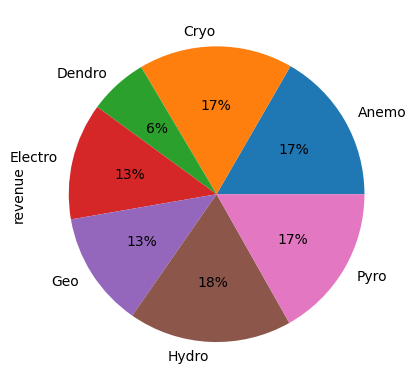

In [ ]:
'''
Create a pie chart for the revenue earned from each vision
'''

# Plotting the pie chart for above dataframe
genshin.groupby(['vision']).sum().plot(
    kind='pie', y='revenue', autopct='%1.0f%%', legend = False)

From the pie chart above, almost all elements provide equal amount of revenue (except for dendro as it is one of the newer elements, released in 2022).

_How much revenue did the female and male characters make?_

In [ ]:
'''
Find out the unique values in the 'gender' column of the dataframe
'''

genshin['gender'].unique()

array(['Medium Male', 'Short Female', 'Tall Male', 'Medium Female',
       'Tall Female'], dtype=object)

In [ ]:
'''
Add the sum of each unique values together, and then total up the 'Female' with 'Female', while the 'Male' with 'Male'
'''

med_male = genshin.loc[genshin['gender'] == 'Medium Male', 'revenue'].sum()
tall_male = genshin.loc[genshin['gender'] == 'Tall Male', 'revenue'].sum()
short_female = genshin.loc[genshin['gender'] == 'Short Female', 'revenue'].sum()
med_female = genshin.loc[genshin['gender'] == 'Medium Female', 'revenue'].sum()
tall_female = genshin.loc[genshin['gender'] == 'Tall Female', 'revenue'].sum()

total_male = med_male + tall_male
total_female = short_female + med_female + tall_female

print("The total revenue for Male 5* characters are: $", "%.2f" % total_male)
print("The total revenue for Female 5* characters are: $", "%.2f" % total_female)

The total revenue for Male 5* characters are: $ 408665928.50
The total revenue for Female 5* characters are: $ 556330928.50


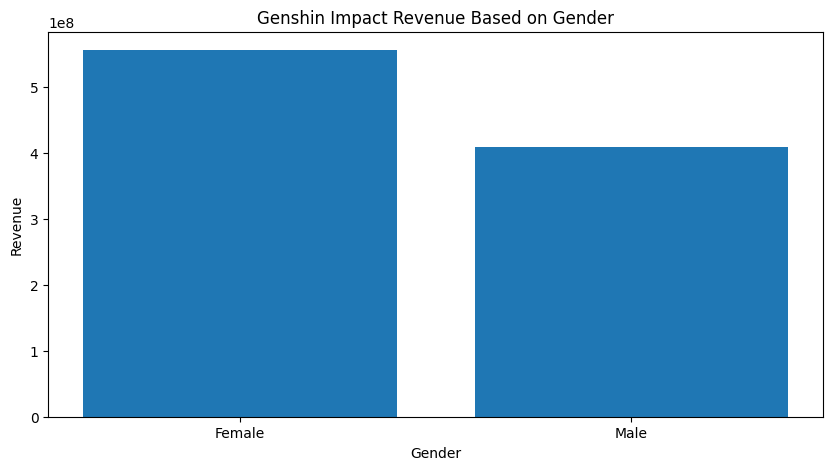

In [ ]:
'''
Creating a bar chart to show female characters vs male characters revenue
'''

# creating the dataset
gender_data = {'Female':total_female, 'Male':total_male}
courses = list(gender_data.keys())
values = list(gender_data.values())

# changing the figure size
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values)

# labeling the axis and giving a title
plt.xlabel("Gender")
plt.ylabel("Revenue")
plt.title("Genshin Impact Revenue Based on Gender")
plt.show()

From the bar chart, it can be seen that there are more revenue sales from female characteers than male characters

_How many reruns have each character had, and how much revenue did each character make?_

In [ ]:
'''
Check the number of reruns each character has had, while listing their total revenue
'''

characters = genshin['5_star_characters'].unique()

reruns = []
char_rev = []

for chara in characters:
  rnum = genshin.loc[genshin['5_star_characters'] == chara, 'rerun'].max()
  crev = genshin.loc[genshin['5_star_characters'] == chara, 'revenue'].sum()
  reruns.append(rnum) #To put the values in a list if needed
  char_rev.append(crev) #To put the values in a list if needed
  print(chara, "has had ", rnum, " reruns and has a total revenue of $", "%.2f" % crev)


Venti has had  3  reruns and has a total revenue of $ 68156700.00
Klee has had  3  reruns and has a total revenue of $ 45389593.50
Tartaglia has had  4  reruns and has a total revenue of $ 41933015.00
Zhongli has had  4  reruns and has a total revenue of $ 53924200.50
Albedo has had  2  reruns and has a total revenue of $ 28194980.00
Ganyu has had  3  reruns and has a total revenue of $ 41455277.00
Xiao has had  3  reruns and has a total revenue of $ 43629594.50
Keqing has had  0  reruns and has a total revenue of $ 9505798.00
Hu Tao has had  2  reruns and has a total revenue of $ 60986662.50
Eula has had  2  reruns and has a total revenue of $ 24361517.00
Kaedehara Kazuha has had  2  reruns and has a total revenue of $ 30941315.50
Kamisato Ayaka has had  2  reruns and has a total revenue of $ 70359605.00
Yoimiya has had  3  reruns and has a total revenue of $ 43576475.50
Raiden Shogun has had  2  reruns and has a total revenue of $ 68760599.50
Sangonomiya Kokomi has had  3  reruns and

_What is the average revenue each day throughout the length of each banner?_

In [ ]:
'''
Creating a list of total days for each character
'''

total_days = []

for chara in characters:
  days = genshin.loc[genshin['5_star_characters'] == chara, 'banner_days'].sum()
  total_days.append(days) #Put it in a list

In [ ]:
'''
Creating a new DataFrame that stores all the data from the lists made
Find the total number of banner days each character has had, and divide the total revenue of each character by the total of days
'''

analysis = pd.DataFrame()

analysis['Characters'] = characters
analysis['Total_reruns'] = reruns
analysis['Character_revenue'] = char_rev
analysis['Banner_days'] = total_days

# Create a column for the average revenue per day
analysis['Average_revenue'] = analysis['Character_revenue'].div(analysis['Banner_days'])

analysis


,Characters,Total_reruns,Character_revenue,Banner_days,Average_revenue
0,Venti,3,68156700.0,85,8.018435e+05
1,Klee,3,45389593.5,84,5.403523e+05
2,Tartaglia,4,41933015.0,102,4.111080e+05
3,Zhongli,4,53924200.5,104,5.185019e+05
4,Albedo,2,28194980.0,61,4.622128e+05
5,Ganyu,3,41455277.0,83,4.994612e+05
6,Xiao,3,43629594.5,78,5.593538e+05
7,Keqing,0,9505798.0,13,7.312152e+05
8,Hu Tao,2,60986662.5,57,1.069941e+06
9,Eula,2,24361517.0,62,3.929277e+05


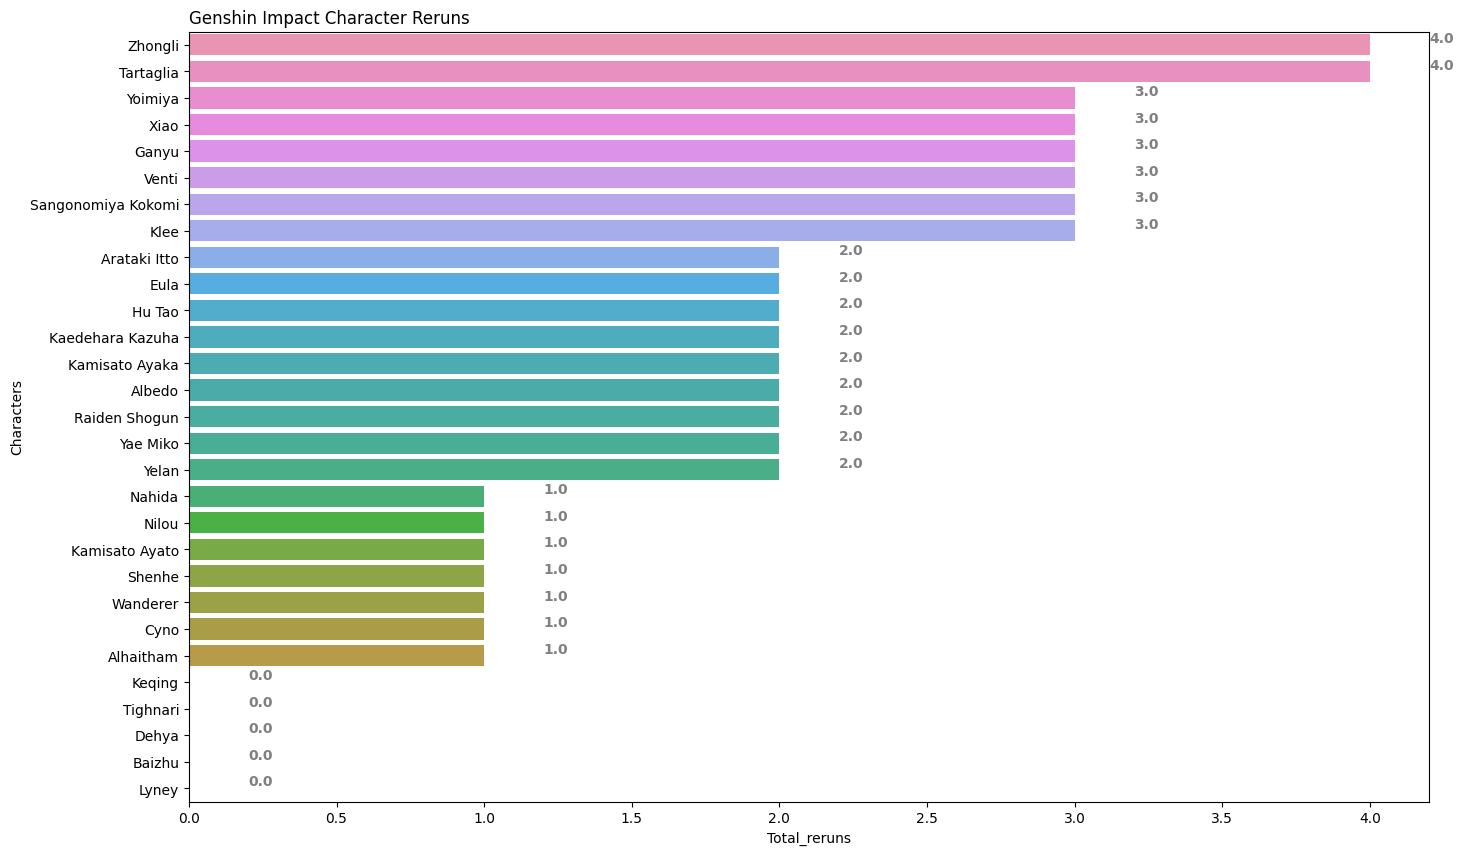

In [ ]:
'''
creating a bar chart showing the characters and the number of reruns each character had
'''

# sort values by revenue price
result = analysis.groupby('Characters')['Total_reruns'].median()

# Figure Size
fig, ax = plt.subplots(figsize =(16, 10))

# plot a bar-plot where bars are ordered by median revenue
ax = sns.barplot(x=result, y=result.index, order=result.sort_values().index);

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('Genshin Impact Character Reruns',
             loc ='left', )

# Show Plot
plt.show()

From the chart above, there are 2 characters with 4 reruns, 6 characters with 3 reruns, 9 characters with 2 reruns, 7 characters with 1 rerun, and 5 characters with 0 rerun. Keqing, Tighnari, and Dehya are standard banner characters, meaning they will not have a limited edition banner anymore. They appeared once for promoting the characters being added into the game, except for Keqing who was used for a temporary banner. Baizhu is confirmed to have a rerun banner for the next update, while Lyney is the most recent limited edition character banner.

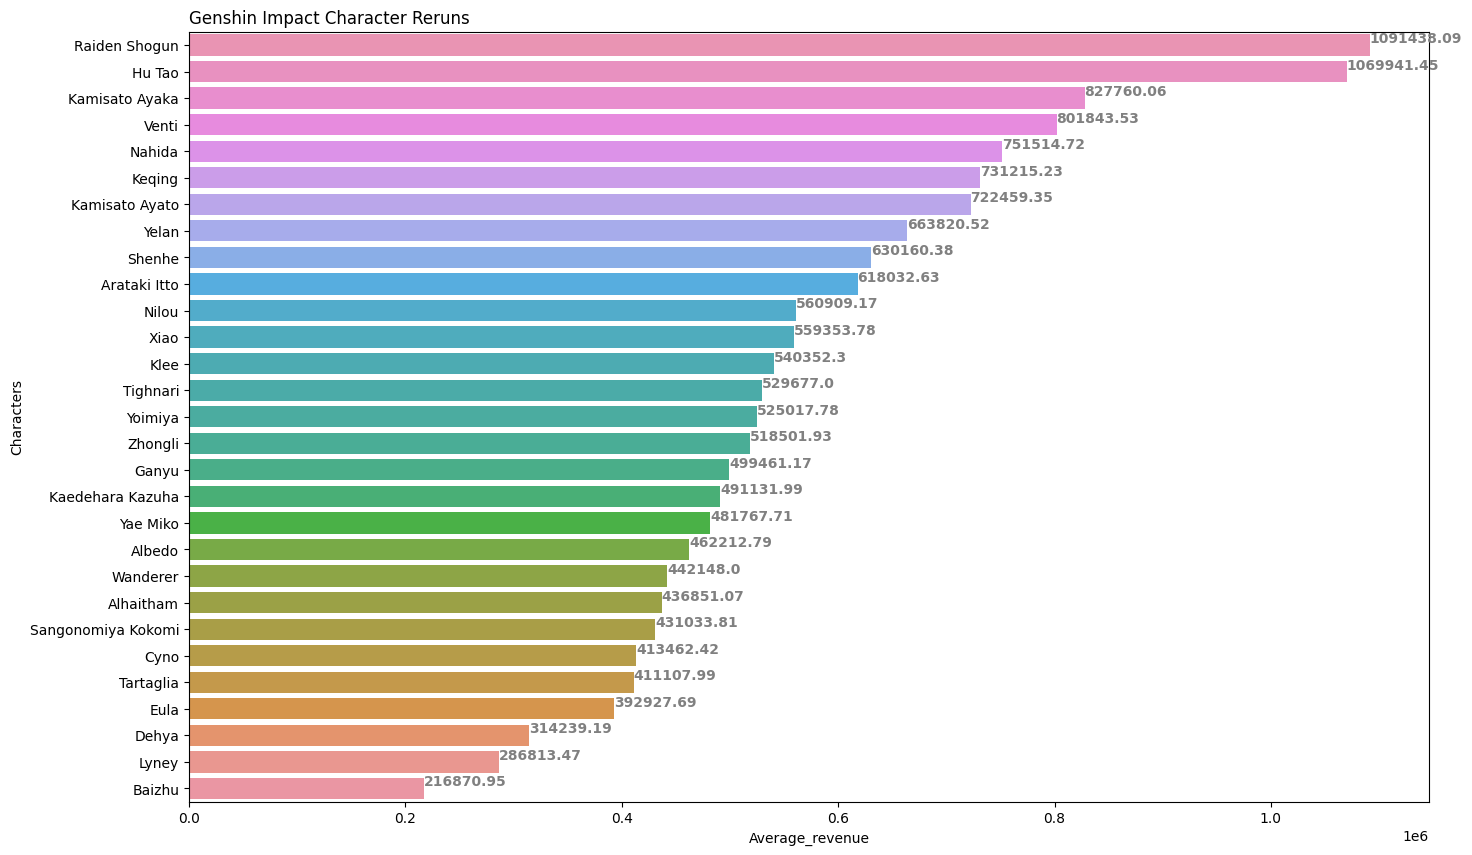

In [ ]:
'''
creating a bar chart showing the characters and the average revenue from the number of banner days
'''

# sort values by revenue price
result = analysis.groupby('Characters')['Average_revenue'].median()

# Figure Size
fig, ax = plt.subplots(figsize =(16, 10))

# plot a bar-plot where bars are ordered by median revenue
ax = sns.barplot(x=result, y=result.index, order=result.sort_values().index);

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('Genshin Impact Character Reruns',
             loc ='left', )

# Show Plot
plt.show()

From the chart above, each character's total revenue can be seen. Raiden Shogun at the highest ranking for revenue sales has made her the most successful character in the game. However, since she has had 2 reruns before, she will most likely not be one of the rerun characters for the next few banners. This applies to Hu Tao and Kamisato Ayaka as well. As for Venti, it is Genshin Impact's first ever limited edition bannr, making players inclined to pay for more 'wishes' to get the strongest character at that time.

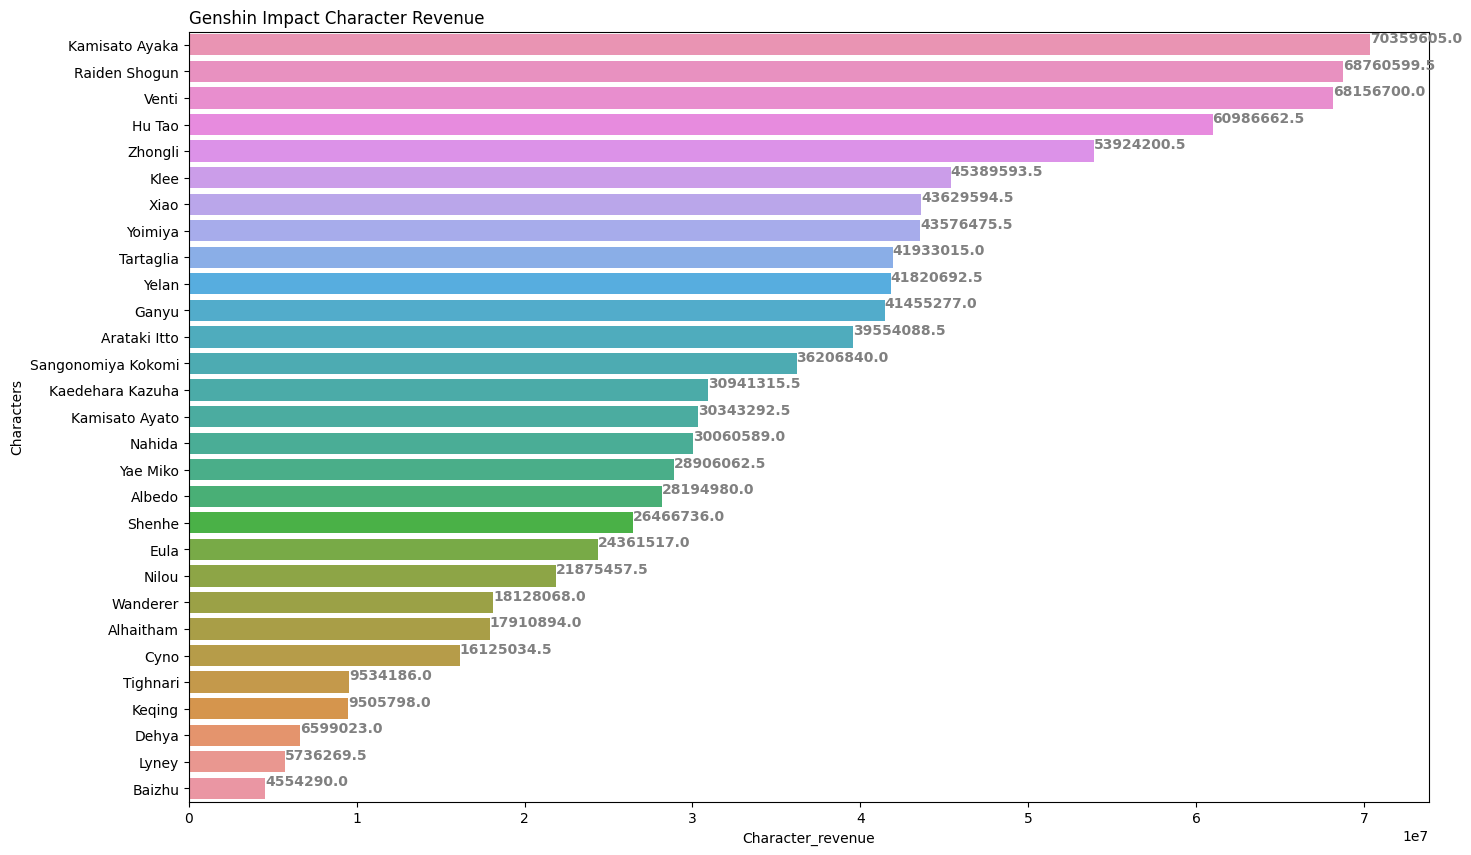

In [ ]:
'''
Creating a bar chart for all characters and their respective revenue
'''

# sort values by revenue price
result = analysis.groupby('Characters')['Character_revenue'].median()

# Figure Size
fig, ax = plt.subplots(figsize =(16, 10))

# plot a bar-plot where bars are ordered by median revenue
ax = sns.barplot(x=result, y=result.index, order=result.sort_values().index);

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('Genshin Impact Character Revenue',
             loc ='left', )

# Show Plot
plt.show()

Based on the bar graph, it is seen that the highest Character Revenue of all time would be from Kamisato Ayaka, and the lowest Character Revenue of all time would be Baizhu.

_What is the revenue trend year after year, and how does this describe the player retention rate?_

In [ ]:
'''
Find the total revenue each year
'''

year_2020 = genshin.loc[(genshin['start_date'] > '2019-12-31') & (genshin['end_date'] < '2021-01-01'), 'revenue'].sum()
year_2021 = genshin.loc[(genshin['start_date'] > '2020-12-31') & (genshin['end_date'] < '2022-01-01'), 'revenue'].sum()
year_2022 = genshin.loc[(genshin['start_date'] > '2021-12-31') & (genshin['end_date'] < '2023-01-01'), 'revenue'].sum()
year_2023 = genshin.loc[(genshin['start_date'] > '2022-12-31') & (genshin['end_date'] < '2024-01-01'), 'revenue'].sum()

print("The total revenue for 2020 is $", year_2020)
print("The total revenue for 2021 is $", year_2021)
print("The total revenue for 2022 is $", year_2022)
print("The total revenue for 2023 is $", year_2023)

The total revenue for 2020 is $ 83091343.0
The total revenue for 2021 is $ 229176452.0
The total revenue for 2022 is $ 375692722.0
The total revenue for 2023 is $ 213897031.0


Since Genshin Impact had only launched at the end of September in 2020, the difference between 2021 and 2021 revenue is significant. The revenue has been increasing annually, and since 2023 is not over yet, there is still a chance for the revenue to go above 2022's revenue. However, there might be a change in player base as miHoYo released a new game earlier in 2023, called "Honkai Star Rail". This could be a cause for the revenue not increasing.

_Decide on the factors that affect rerun revenue and display top 5 characters that would have the highest probability for the highest rerun._

- Should not have more than 2 reruns in total
- Should be within the top 7 of character revenue
- Should be within the top 7 of average character revenue
- Should not be a standard 5* character banner (Keqing, Dehya, and Tighnari are standard banner characters that were a limited-edition banner to promote them. They will not be appearing in future limited edition banners.)
- Should not be a character that appeared within the last 6 months

In [ ]:
'''
First table that displays the top 7 characters with the highest character revenue
'''

result = analysis[(analysis['Total_reruns'] < 3) & (analysis['Characters'] != 'Keqing') & (analysis['Characters'] != 'Dehya') & (analysis['Characters'] != 'Tighnari')].sort_values('Character_revenue', ascending = False)

result.head(7)

,Characters,Total_reruns,Character_revenue,Banner_days,Average_revenue
11,Kamisato Ayaka,2,70359605.0,85,8.277601e+05
13,Raiden Shogun,2,68760599.5,63,1.091438e+06
8,Hu Tao,2,60986662.5,57,1.069941e+06
19,Yelan,2,41820692.5,63,6.638205e+05
15,Arataki Itto,2,39554088.5,64,6.180326e+05
10,Kaedehara Kazuha,2,30941315.5,63,4.911320e+05
18,Kamisato Ayato,1,30343292.5,42,7.224593e+05


In [ ]:
'''
Second table that displays the top 7 characters with the highest average revenue
'''

result = analysis[(analysis['Total_reruns'] < 3) & (analysis['Characters'] != 'Keqing') & (analysis['Characters'] != 'Dehya') & (analysis['Characters'] != 'Tighnari')].sort_values('Average_revenue', ascending = False)

result.head(7)

,Characters,Total_reruns,Character_revenue,Banner_days,Average_revenue
13,Raiden Shogun,2,68760599.5,63,1.091438e+06
8,Hu Tao,2,60986662.5,57,1.069941e+06
11,Kamisato Ayaka,2,70359605.0,85,8.277601e+05
23,Nahida,1,30060589.0,40,7.515147e+05
18,Kamisato Ayato,1,30343292.5,42,7.224593e+05
19,Yelan,2,41820692.5,63,6.638205e+05
16,Shenhe,1,26466736.0,42,6.301604e+05


In [ ]:
'''
Third table to display the characters with a rerun value lower than 3 and is not older than 9 months ago (to crosscheck)
'''

result = genshin[(genshin['end_date'] > '2023-02-01') & (genshin['rerun'] < 3)].sort_values(by = ['rerun', 'end_date', 'revenue'], ascending = False)

result

,version,version_name,start_date,end_date,5_star_characters,rerun,revenue,banner_days,avg_revenue,vision,gender
62,3.5,Windblume's Breath,2023-03-21,2023-11-04,Kamisato Ayaka,2,17969533.0,21,8.556920e+05,Cryo,Medium Female
72,3.8,Secret Summer Paradise,2023-05-07,2023-07-25,Eula,2,3229094.0,20,1.614547e+05,Cryo,Tall Female
69,3.7,Duel! The Summoners' Summit!,2023-05-24,2023-06-13,Yae Miko,2,4577094.0,20,2.288547e+05,Electro,Tall Female
77,4.0,As Light Rain Falls Without Reason,2023-08-16,2023-05-09,Yelan,2,5736269.5,20,2.868135e+05,Hydro,Tall Female
70,3.7,Duel! The Summoners' Summit!,2023-06-13,2023-04-07,Kaedehara Kazuha,2,8729964.0,21,4.157126e+05,Anemo,Medium Male
58,3.4,The Exquisite Night Chimes,2023-07-02,2023-02-28,Hu Tao,2,23278076.5,21,1.108480e+06,Pyro,Medium Female
63,3.5,Windblume's Breath,2023-03-21,2023-11-04,Shenhe,1,17969533.0,21,8.556920e+05,Cryo,Tall Female
75,3.8,Secret Summer Paradise,2023-07-25,2023-08-15,Wanderer,1,4564815.5,21,2.173722e+05,Anemo,Medium Male
71,3.7,Duel! The Summoners' Summit!,2023-06-13,2023-04-07,Alhaitham,1,8729964.0,21,4.157126e+05,Dendro,Tall Male
61,3.5,Windblume's Breath,2023-01-03,2023-03-21,Cyno,1,6599023.0,21,3.142392e+05,Electro,Medium Male


_Do a hypothesis test on whether the revenue made from female characters are the same with the revenue made from male characters_

**H0**: Total revenue of Female Characters = Male Characters

**H1**: Total revenue of Female Characters != Male Characters

In [ ]:
'''
Creating the variable to put in the testing method
'''

Male = genshin[(genshin['gender']=='Medium Male') | (genshin['gender']=='Tall Male')][['revenue']]
Female = genshin[(genshin['gender']=='Short Female') | (genshin['gender']=='Medium Female') | (genshin['gender']=='Tall Female')][['revenue']]

print('Average Revenue of Female Characters =',Female['revenue'].mean())
print('Average Revenue of Male Characters =',Male['revenue'].mean())

Average Revenue of Female Characters = 13245974.488095239
Average Revenue of Male Characters = 10754366.539473685


In [ ]:
'''
Hypothesis testing using t_stat and p_val for female and male revenue
'''

t_stat, p_val = stats.ttest_ind(Female['revenue'], Male['revenue'])
print('T-Statistic:',t_stat)
print('P-value:',p_val) #

T-Statistic: 1.7400767858882296
P-value: 0.08578962098106817


The revenue for Female characters is more than the revenue for male characters. This means the performance sales for Female characters do better than the Male characters in Genshin Impact. This could be affected by the fact that there are more 'models' and Female characters compared to Male characters.

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
'''
Save the 2 dataframes into csv files
'''
genshin.to_csv('/content/gdrive/My Drive/genshin_main.csv', index=False)
analysis.to_csv('/content/gdrive/My Drive/genshin_analysis.csv', index=False)

# Conclusion



Based on the findings from all the data analysis and calculations, the top 5characters that would provide the most revenue are:
1. Raiden Shogun
2. Hu Tao
3. Kamisato Ayaka
4. Nahida
5. Yelan

Based on the first two tables showing the top 7 characters based on their total revenue and averaged revenue per day, the top 3 were the same, but the 4th and 5th character were different. Taking into account for the top 5 overall, the 4th placed character from both tables were taken for the 4th and 5th place for the total of 5 characters.

From the alst 9 months, the only character that appeared from the 5 characters were Kamisato Ayaka and Yelan. This means that out of the 5 listed characters, the next banner (that has not been leaked yet) should either be between the choices of:
- Raiden Shogun
- Hu Tao
- Nahida

For further analysis, out of all the mentioned characters, the character with the least reruns is Nahida. This means that the most logical character to put as a rerun banner character would be Nahida. This is because there has been less days for players to 'wish' for Nahida, and the probability that most of the player base have already gotten the characters they wanted (Raiden Shogun, Hu Tao, Kamisato Ayaka, and Yelan) is higher compared to that for Nahida.

In [ ]:
analysis.sort_values('Average_revenue', ascending = False)

,Characters,Total_reruns,Character_revenue,Banner_days,Average_revenue
13,Raiden Shogun,2,68760599.5,63,1.091438e+06
8,Hu Tao,2,60986662.5,57,1.069941e+06
11,Kamisato Ayaka,2,70359605.0,85,8.277601e+05
0,Venti,3,68156700.0,85,8.018435e+05
23,Nahida,1,30060589.0,40,7.515147e+05
7,Keqing,0,9505798.0,13,7.312152e+05
18,Kamisato Ayato,1,30343292.5,42,7.224593e+05
19,Yelan,2,41820692.5,63,6.638205e+05
16,Shenhe,1,26466736.0,42,6.301604e+05
15,Arataki Itto,2,39554088.5,64,6.180326e+05


Based on the table above, it can be seen that Nahida is within the top 10 for average character revenue per day. This means she is within the top 20% of the average revenue.

**The character in Genshin Impact that would rpovide the most revenue for miHoYo as a rerun banner by analyzing past data from 2020-2023 for the 4.4 Banner update in 20 December 2023 would most likely be Nahida.**